In [1]:
from pedigree_functions import *
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\Philip\miniconda3\envs\Masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
C:\Users\Philip\miniconda3\envs\Masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


In [2]:
#read genetic map
genmap = pd.read_csv("data/test_data/B73_genmap.csv")
#read parent genotypes
parent_genos = pd.read_csv("data/test_data/NAM_parent_genos.csv")
#read reference allele
ref_allele = pd.read_csv("data/test_data/B73_alleles.csv")

In [5]:
#pedigree to simulate (for illustration: 5 instead of 194 offspring)
cross_selfing_pedigree = cross_selfing_ped(offspring = 5, selfing_genos = 5)
#turn pedigree into tskit treesquence with sequence length 100 (real: ~2 Gigabases per chromosomes)
cs_ped_ts = df_to_ts(cross_selfing_pedigree, seq_len = 100)

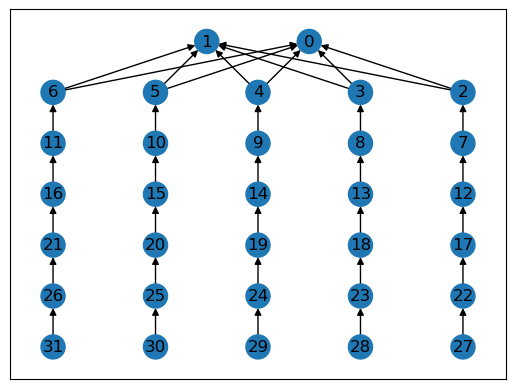

In [7]:
#pedigree
draw_pedigree(cs_ped_ts.tree_sequence())

In [8]:
#simulate ancestry in fixed pedigree for ancestral recombination graph (ARG)
cs_ped_arg = msprime.sim_ancestry(initial_state = cs_ped_ts, model = "fixed_pedigree", 
                                  random_seed = 42, recombination_rate = 0.001)

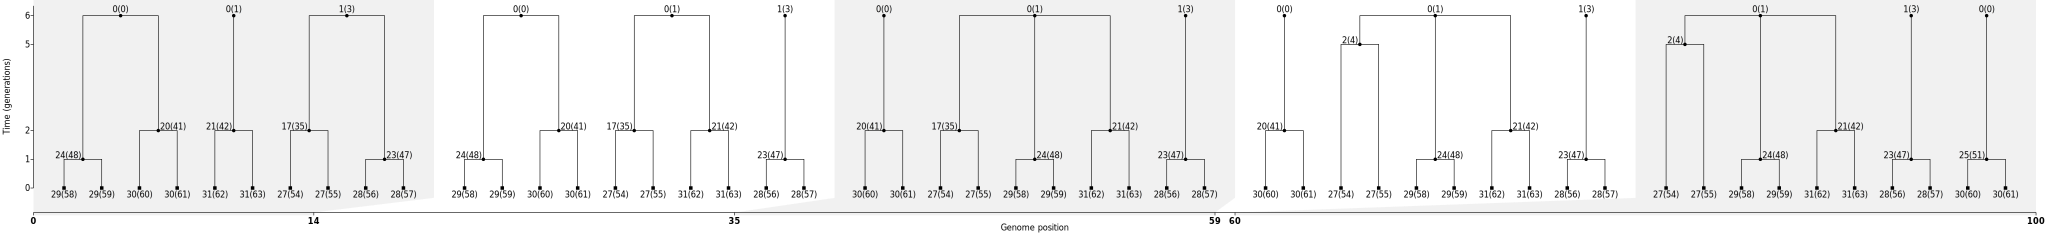

In [9]:
#draw ARG
draw_ancestry(cs_ped_arg)

In [10]:
#print ARG in tskit table form -> Nodes and edges draw ARG, i.e. where simulated recombination events occured in pedigree
print(cs_ped_arg.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │   0, 1│ {'file_id': '2'}║
║3 │    0│        │   0, 1│ {'file_id': '3'}║
║4 │    0│        │   0, 1│ {'file_id': '4'}║
║5 │    0│        │   0, 1│ {'file_id': '5'}║
║6 │    0│        │   0, 1│ {'file_id': '6'}║
║7 │    0│        │   2, 2│ {'file_id': '7'}║
║8 │    0│        │   3, 3│ {'file_id': '8'}║
║9 │    0│        │   4, 4│ {'file_id': '9'}║
║10│    0│        │   5, 5│{'file_id': '10'}║
║11│    0│        │   6, 6│{'file_id': '11'}║
║12│    0│        │   7, 7│{'file_id': '12'}║
║13│    0│        │   8, 8│{'file_id': '13'}║
║14│    0│        │   9, 9│{'file_id': '14'}║
║15│    0│        │ 10, 10│{'file_id': '15'}║
║16│    0│        │ 11, 11│{'file_i

In [3]:
#simulate whole offspring genotypes of cross + 5 selfing genos pedigree with founders B73 and CML103
whole_sim = genotype_simulation(genetic_map = genmap, parent_genos = parent_genos, ref_allele = ref_allele, 
                                founder_list = list(["B73", "CML103"]), offspring = 194, selfing_genos = 5)

finished chromsome 1
finished chromsome 2
finished chromsome 3
finished chromsome 4
finished chromsome 5
finished chromsome 6
finished chromsome 7
finished chromsome 8
finished chromsome 9
finished chromsome 10


In [11]:
whole_sim

SNP         PHM10225.15  PHM10321.11  PHM10404.8  PHM11114.7  PHM11226.13  \
individual                                                                  
972                   0            0           0           0            1   
973                   0            0           0           0            2   
974                   2            0           0           0            0   
975                   0            0           0           2            0   
976                   0            0           0           0            0   
...                 ...          ...         ...         ...          ...   
1161                  2            0           0           0            2   
1162                  2            0           0           0            0   
1163                  0            0           0           2            2   
1164                  0            0           0           2            0   
1165                  2            0           0           2            2   

SNP         PHM11985.27  PHM1218.6  PHM12706.14  PHM12749.13  PHM1275.22  ...  \
individual                                                                ...   
972                   2          0            0            0           0  ...   
973                   2          0            0            0           2  ...   
974                   2          0            0            0           0  ...   
975                   0          0            0            2           2  ...   
976                   0          0            0            2           0  ...   
...                 ...        ...          ...          ...         ...  ...   
1161                  2          0            0            2           2  ...   
1162                  2          0            0            2           1  ...   
1163                  2          0            0            2           0  ...   
1164                  2          0            0            0           2  ...   
1165                  0          0            0            0           0  ...   

SNP         kip1.3  lac1.3  sh2.21  umc128.2  umc13.1  vdac1a.1  wx1.1  \
individual                                                               
972              0       0       2         0        2         0      2   
973              0       2       0         0        2         0      0   
974              0       0       2         0        2         0      0   
975              0       0       2         0        0         0      2   
976              0       0       0         0        0         0      2   
...            ...     ...     ...       ...      ...       ...    ...   
1161             0       2       0         0        2         0      2   
1162             0       0       0         0        0         0      0   
1163             0       2       2         0        2         0      2   
1164             0       0       0         0        0         0      2   
1165             0       0       0         0        0         0      0   

SNP         zb21.1  zb27.1  zfl2.9  
individual                          
972              0       2       2  
973              0       0       2  
974              0       2       2  
975              0       2       2  
976              0       0       0  
...            ...     ...     ...  
1161             0       0       2  
1162             0       0       0  
1163             0       2       1  
1164             0       0       2  
1165             0       0       2  

[194 rows x 974 columns]

Text(0.5, 1.0, 'KDE density function of simulated additive genotypes')

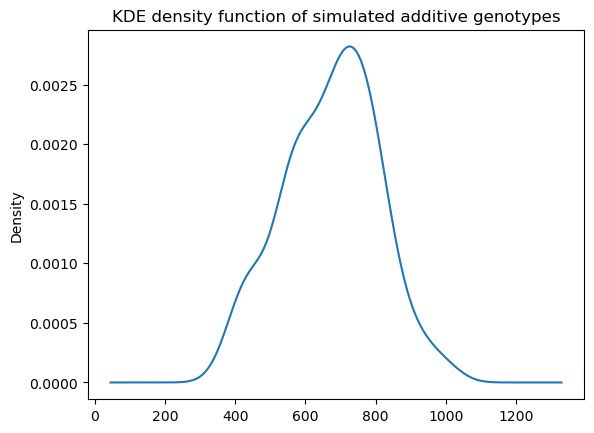

In [12]:
whole_sim.sum(axis = 1).plot.kde()
plt.title("KDE density function of simulated additive genotypes")

In [18]:
#mean and variance of additive genotype encoding in simulated genotypes
whole_sim.sum(axis = 1).mean()

672.2886597938144

In [19]:
whole_sim.sum(axis = 1).var()

18233.491373324076

In [20]:
#table of homozygous and heterozygous alleles
pd.Series(whole_sim.values.flatten().tolist()).value_counts()

0    121699
2     63167
1      4090
Name: count, dtype: int64

In [13]:
#original population two (cross B73 and CML103) genotypes and allele frequencies
pop_2_genos = pd.read_csv("data/test_data/pop_2_genos.csv")
pop_2_genos = pop_2_genos[pop_2_genos.columns.intersection(genmap["Marker"])]

In [25]:
pop_2_genos

PZA01271.1  PZA03613.1  PZA02129.1  PZA02032.1  PHM2244.142  PZA02372.1  \
0             2           2         2.0         2.0          1.5         1.0   
1             2           2         2.0         2.0          2.0         2.0   
2             0           0         0.0         0.0          0.0         1.0   
3             0           0         0.0         0.0          0.0         2.0   
4             0           0         0.0         0.0          0.0         0.0   
..          ...         ...         ...         ...          ...         ...   
191           2           2         2.0         2.0          2.0         2.0   
192           2           2         2.0         2.0          0.0         0.0   
193           2           2         2.0         2.0          2.0         2.0   
194           0           0         0.0         0.0          0.0         0.0   
195           2           2         2.0         2.0          2.0         2.0   

     PHM6238.36  PZA00181.2  PZA00528.1  PZA00175.2  ...  PZA03607.1  \
0           1.0           1           1         1.5  ...         0.0   
1           2.0           2           2         2.0  ...         2.0   
2           1.0           1           1         1.0  ...         2.0   
3           2.0           2           2         2.0  ...         0.0   
4           0.0           0           0         0.5  ...         0.0   
..          ...         ...         ...         ...  ...         ...   
191         2.0           2           2         2.0  ...         1.0   
192         0.0           0           0         0.0  ...         1.0   
193         2.0           2           2         2.0  ...         2.0   
194         0.0           0           0         0.0  ...         1.0   
195         2.0           2           2         2.0  ...         0.0   

     PZA00130.9  PZA02969.9  PZA02049.1  PZA00007.1  PHM5435.25  PZA01073.1  \
0           0.0         0.0         0.0         0.0           0         0.0   
1           2.0         2.0         2.0         2.0           2         2.0   
2           2.0         2.0         2.0         2.0           2         2.0   
3           0.0         0.0         0.0         0.0           0         0.0   
4           0.0         0.0         0.0         0.0           0         0.0   
..          ...         ...         ...         ...         ...         ...   
191         1.0         0.0         0.0         0.0           0         0.0   
192         1.0         0.0         0.0         0.0           0         0.0   
193         2.0         2.0         2.0         2.0           2         2.0   
194         1.0         2.0         2.0         2.0           2         2.0   
195         0.0         0.0         0.0         0.0           0         0.0   

     PZA01001.2  PZA02578.1  PZA00062.4  
0           0.0         0.0           0  
1           2.0         2.0           2  
2           2.0         2.0           2  
3           0.0         0.0           0  
4           0.0         0.0           2  
..          ...         ...         ...  
191         0.0         0.0           0  
192         0.0         0.0           0  
193         2.0         2.0           2  
194         2.0         2.0           2  
195         0.0         0.0           0  

[196 rows x 974 columns]

Text(0.5, 1.0, 'KDE density function of original additive genotypes')

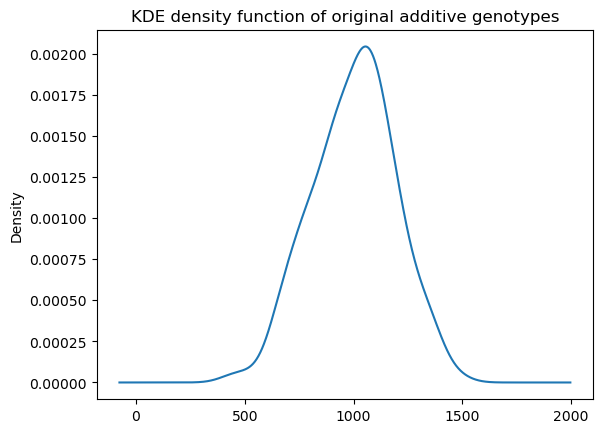

In [15]:
pop_2_genos.sum(axis = 1).plot.kde()
plt.title("KDE density function of original additive genotypes")

In [21]:
#mean and variance of additive genotype encoding in real genotypes
pop_2_genos.sum(axis = 1).mean()

1001.5204081632653

In [22]:
pop_2_genos.sum(axis = 1).var()

35802.91496598639

In [24]:
#table of homozygous and heterozygous alleles
pd.Series(pop_2_genos.values.flatten().tolist()).value_counts()

2.0    90847
0.0    85484
1.0    11899
1.5     1368
0.5     1306
Name: count, dtype: int64

In [ ]:
#-> distribution of alleles in simulated genotypes matches real genotypes. However, too few heterozygous alleles are simulated.
#-> Vary genetic map recombination rates, check recombination tract length and distribution of heterozygous alleles throughout
#generations to achieve higher accuracy?